## NEW PROJECT. HEART DISEASE PREDICTION USING SUPERVISED LEARNING

In [10]:
# Import neccessary libraries

# Libraries for Data Analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries (Machine learning algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.7 MB 919.0 kB/s eta 0:01:49
   ---------------------------------------- 0.1/99.7 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.3/99.7 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.4/99.7 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.6/99.7 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.8/99.7 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 1.2/99.7 MB 3.1 MB/s eta 0:00:32
    ------------------------

In [12]:
# Load dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Features in the Dataset and meaning

The heart CSV dataset contains 303 records and 14 columns, including the target variable. 

The features include

age - age in years

sex-(male = 1; female = 0)

chest pain type (cp)-Typical angina =1; atypical angina=2; non-angina =3; asymptomatic =4)

resting blood pressure (trestbps)

serum cholesterol (chol)

fasting blood sugar (fbs) >120 mg.dl (True=1; False=2)

resting electrocardiographic results (restecg)

maximum heart rate achieved (thalach)

exercise-induced angina (exang) (yes = 1; No=0)

ST depression induced by exercise relative to rest (oldpeak)

the slope of the peak exercise ST segment (slope)

number of major vessels colored by flourosopy (ca)

thalassemia (thal) (normal=3; fixed defect = 6; reversable defect = 7)

Target (output) have disease or not (Yes=1; No=0)

In [17]:
# For better understanding and flow of analysis, I will rename some of the columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestorol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Data verification - Data type, number of features and rows, missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholestorol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [19]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
df.shape

(303, 14)

In [22]:
df.size

4242

In [23]:
df.ndim

2

In [24]:
# Statistical Analysis
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# CHECK FOR MISSING VALUES
df.isnull().sum()


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholestorol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

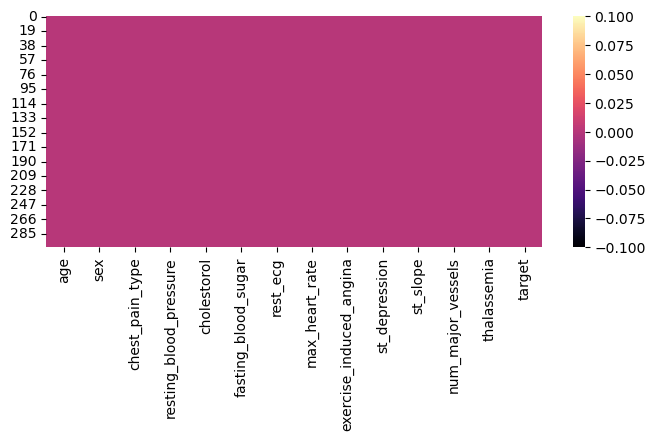

In [30]:
# Visualize the missing values
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=True, cmap='magma', color='b');

### EXPLORATORY DATA ANALYSIS

In [31]:
# Univariate Data Analysis

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestorol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

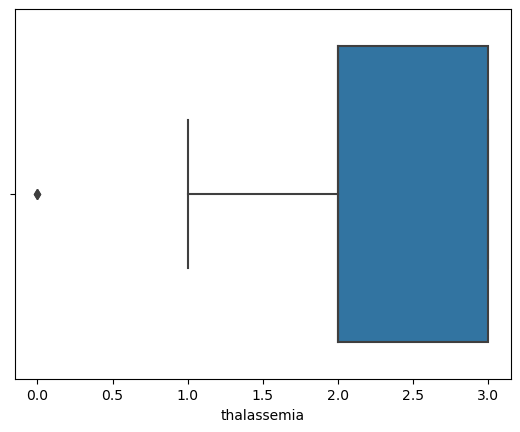

In [34]:
# Check for outliers
sns.boxplot(x=df['thalassemia']);

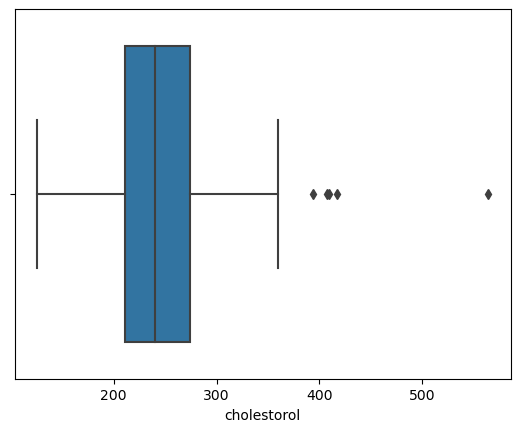

In [36]:
# Check for outliers
sns.boxplot(x=df['cholestorol']);

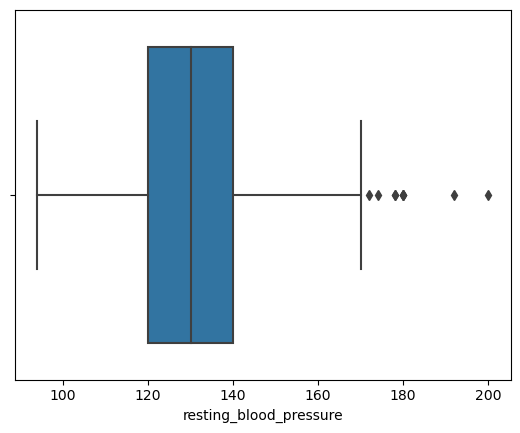

In [37]:
# Check for outliers
sns.boxplot(x=df['resting_blood_pressure']);

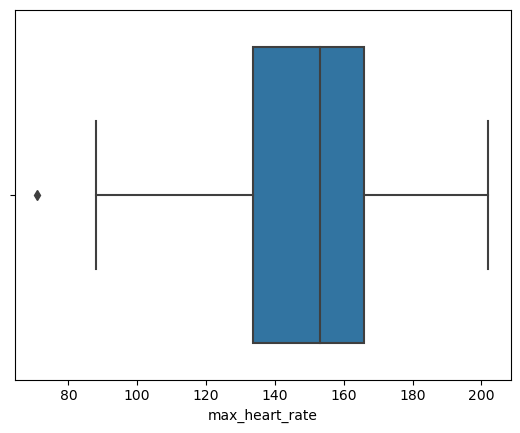

In [38]:
# Check for outliers
sns.boxplot(x=df['max_heart_rate']);

Text(0.5, 1.0, 'Total Number of Patients')

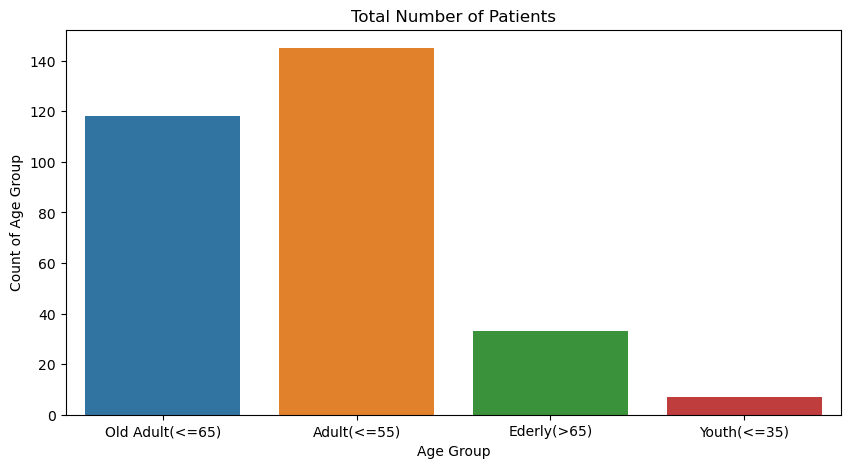

In [40]:
# Data visualization
# Age_bracket
def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <=55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Ederly(>65)'
    
# To create the new column of Age_bracket
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

In [42]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


Text(0.5, 1.0, 'Total Number of Patients')

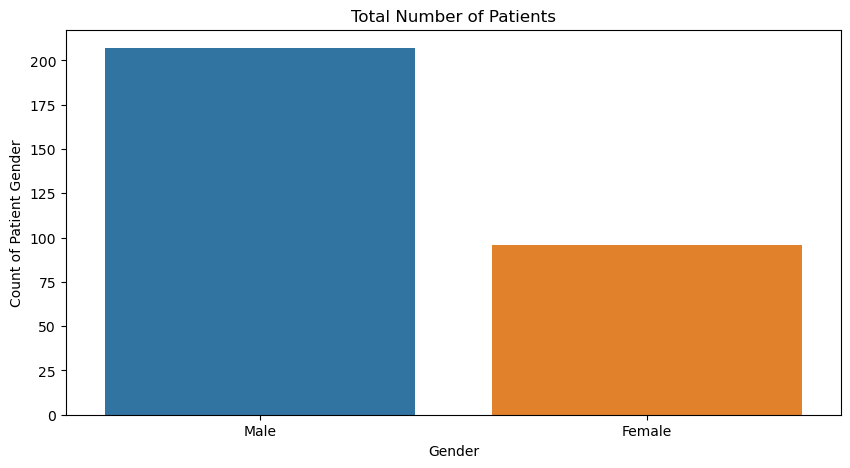

In [44]:
# Data visualizaito for sex
def Gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
# To create the new column of Gender
df['Gender'] = df['sex'].apply(Gender)

# Investigating the sex (gender) for patients
plt.figure(figsize = (10,5))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

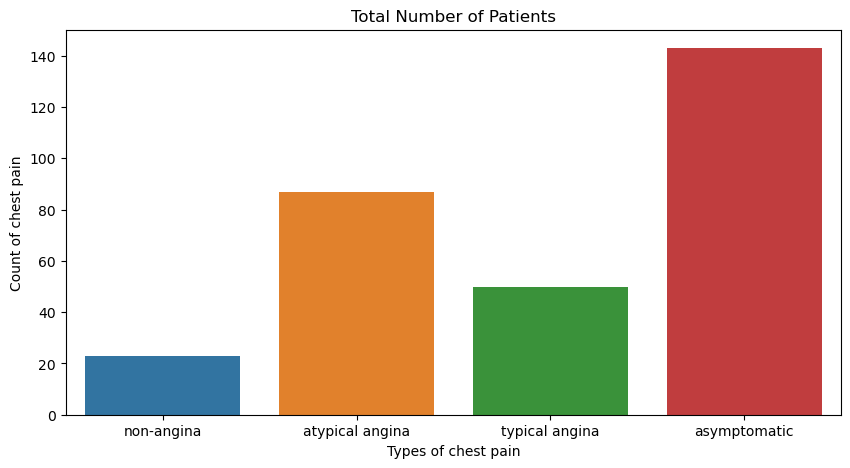

In [55]:
# Data visualizaito for chest_pain
# chest_pain_type - 1:typical angina, 2:atypical angina, 3:non-angina, 4:asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp ==2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-angina'
    else:
        return 'asymptomatic'
    
# To create the new column of Gender
df['cp_cat']=df['chest_pain_type'].apply(chest_pain)

# Investigating the chest pain type
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of chest pain')
plt.title('Total Number of Patients')

In [56]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,Gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


Text(0.5, 1.0, 'Total Number of Patients')

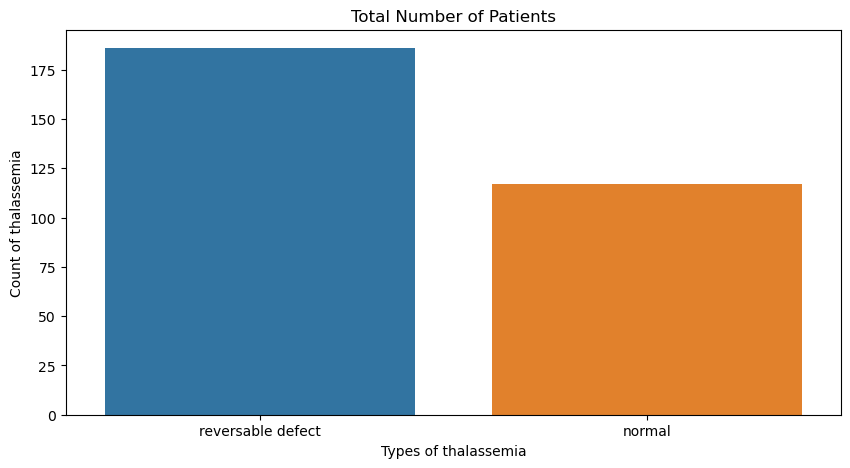

In [70]:
# Data visualizaito for Thalassemia
# thalassemia (thal) (normal=3; fixed defect = 6; reversable defect = 7)

def thalassemia(thal):
    if thal == 3:
        return 'normal'
    elif thal ==6:
        return 'fixed defect'
    else:
        return 'reversable defect'
    
# To create the new column of thalassemia
df['thal_cat']=df['thalassemia'].apply(thalassemia)

# Investigating the chest pain type
plt.figure(figsize = (10,5))
sns.countplot(x='thal_cat', data=df)
plt.xlabel('Types of thalassemia')
plt.ylabel('Count of thalassemia')
plt.title('Total Number of Patients')

In [71]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,Gender,cp_cat,CVD,thal_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina,Has CVD,reversable defect
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Has CVD,reversable defect
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Has CVD,reversable defect
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Has CVD,reversable defect
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Has CVD,reversable defect


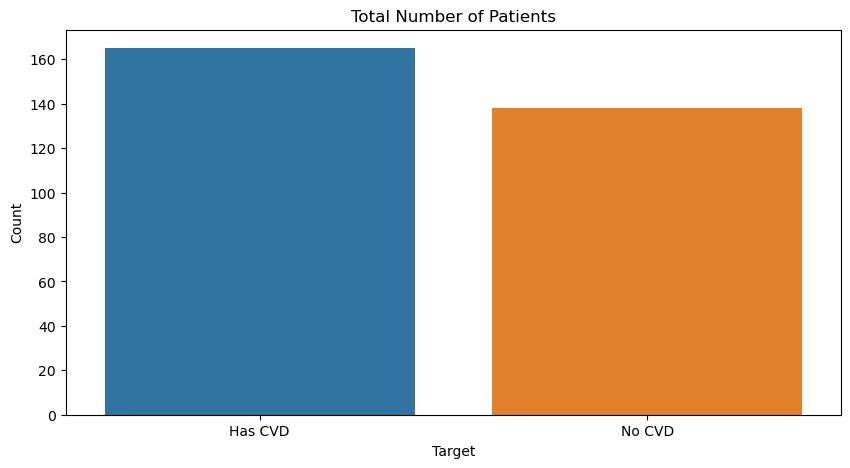

In [59]:
# Data visualizaito for the Target
# Target - if patients has disease or not (1:yes, 0:no)

def CVD(target):
    if target == 1:
        return 'Has CVD'
    else:
        return 'No CVD'
    
# To create the new column of CVD
df['CVD']=df['target'].apply(CVD)

# Value count of tatol patient in each category
df['CVD'].value_counts()

# Investigating CVD
plt.figure(figsize = (10,5))
sns.countplot(x='CVD', data=df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Total Number of Patients');

In [60]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,Gender,cp_cat,CVD
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina,Has CVD
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Has CVD
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Has CVD
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Has CVD
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Has CVD


In [61]:
df['CVD'].value_counts()

Has CVD    165
No CVD     138
Name: CVD, dtype: int64

### Bivariate Data Analysis



Text(0.5, 1.0, 'Total Number of Patients')

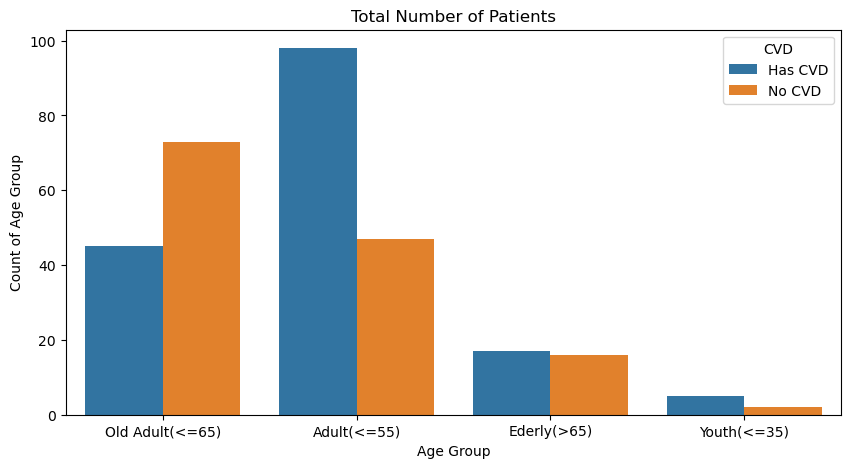

In [64]:
# Investigating the age group of patients by the target features
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='CVD')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

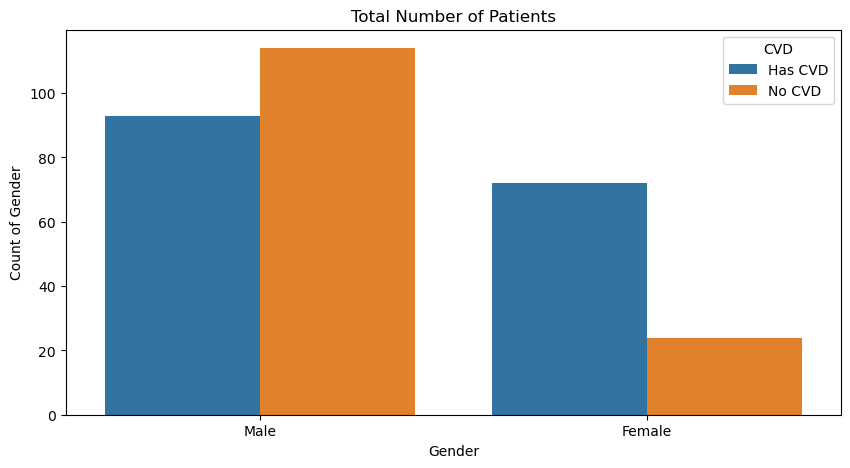

In [66]:
# Investigating the Gender of patients by the target features
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=df, hue='CVD')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients')

In [67]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,Gender,cp_cat,CVD
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina,Has CVD
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Has CVD
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Has CVD
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Has CVD
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Has CVD


Text(0.5, 1.0, 'Total Number of Patients')

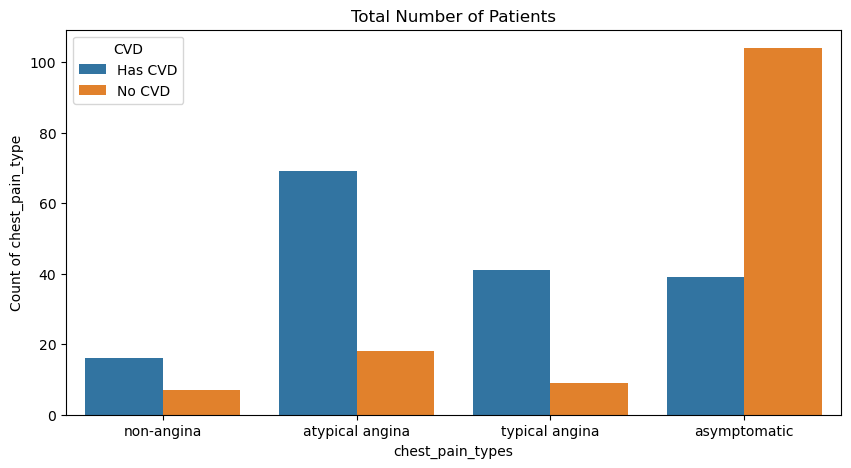

In [69]:
# Investigating the chest pain types of patients by the target features
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='CVD')
plt.xlabel('chest_pain_types')
plt.ylabel('Count of chest_pain_type')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

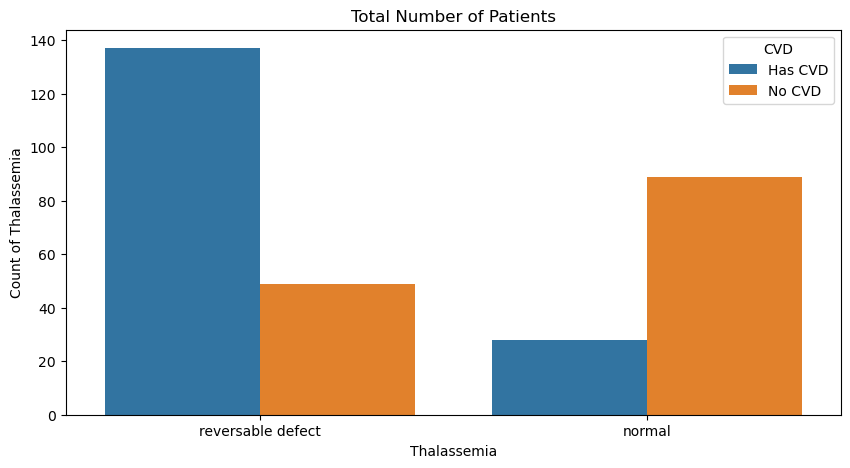

In [72]:
# Investigating the thalassemia of patients by the target features
plt.figure(figsize=(10,5))
sns.countplot(x='thal_cat', data=df, hue='CVD')
plt.xlabel('Thalassemia')
plt.ylabel('Count of Thalassemia')
plt.title('Total Number of Patients')

## Multivariate Data Analysis

In [81]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestorol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

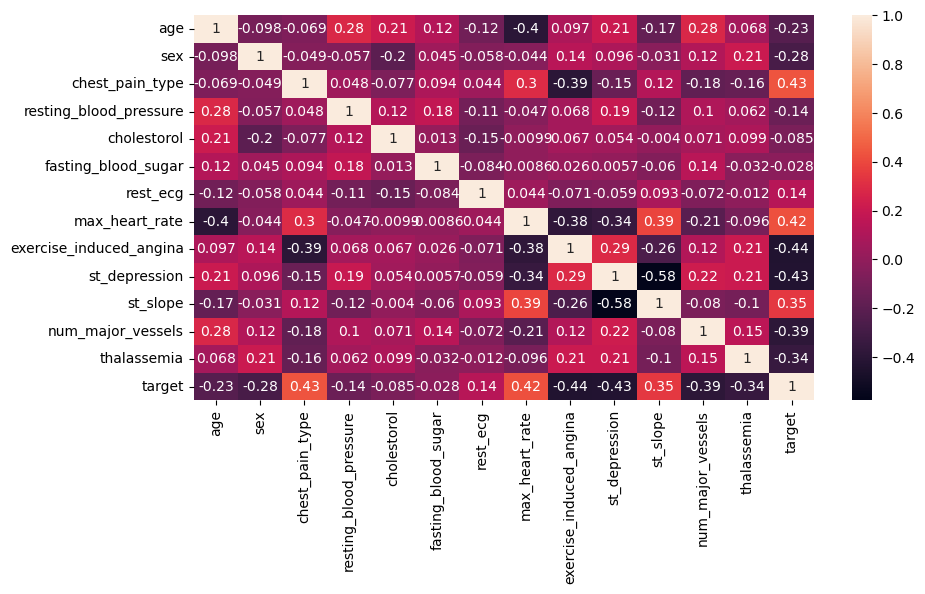

In [83]:
# To visualize using the correlation using heatmat
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)

### Feature Engineering/Data Pre-processing

In [84]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,Gender,cp_cat,CVD,thal_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina,Has CVD,reversable defect
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Has CVD,reversable defect
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Has CVD,reversable defect
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Has CVD,reversable defect
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Has CVD,reversable defect


#### We need to take out the created columns because we don't need them. we also have to remove the target (output).
To do that we need to create a new DataFrame

In [85]:
# Create a copy of the data (exclude target/label alongside other columns created earlier)
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestorol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']]

CVD = df[['target']]

In [86]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
CVD.head(200)

,target
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [95]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholestorol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

#### Dealing with outliers

We need to deal with the outliers in our data, if not it will affect the model performance


In [102]:
# outliers in the data - 'resting_blood_pressure, cholesterol, thalassemia'

# Normalization of the Data
scaler = MinMaxScaler()

#To scale every colums from 0 to 1. and creating a new column with them
df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1['Scaled_chol'] = scaler.fit_transform(df1[['cholestorol']].values.reshape(-1, 1))
df1['Scaled_thal'] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1[['max_heart_rate']].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'cholestorol', 'thalassemia', 'max_heart_rate'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,1,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,1,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,1,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,1,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,1,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [103]:
# split the dataset into training and testing sets ----- X = Questions,  Y = Answers
x_train, x_test, y_train, y_test = train_test_split(df1, CVD, test_size=0.2, random_state=42)

In [104]:
x_train

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,1,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,1,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0,0.216981,0.237443,1.000000,0.679389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,0,1,0,0.6,1,1,0,0.433962,0.244292,1.000000,0.702290
71,51,1,2,0,1,1,0.0,2,1,1,0.000000,0.230594,1.000000,0.633588
106,69,1,3,1,0,0,0.1,1,1,1,0.622642,0.246575,0.666667,0.458015
270,46,1,0,0,0,0,0.8,2,0,0,0.245283,0.280822,1.000000,0.557252


In [105]:
y_train.head(4)

,target
132,1
202,0
196,0
75,1


In [106]:
x_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,1,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0,0.481132,0.356164,1.000000,0.541985


In [108]:
y_test.head(4)

,target
179,0
228,0
111,1
246,0


#### Model Building

In [110]:
#  Using Logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


In [111]:
x_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,target,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,1,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0,0.481132,0.356164,1.000000,0.541985


In [112]:
ly_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [113]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


<function matplotlib.pyplot.show(close=None, block=None)>

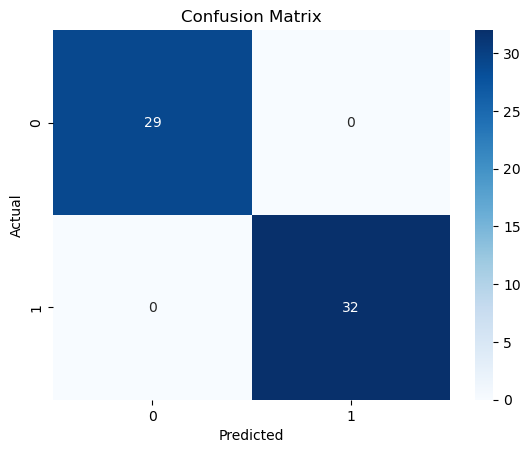

In [115]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

In [116]:
# Using Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

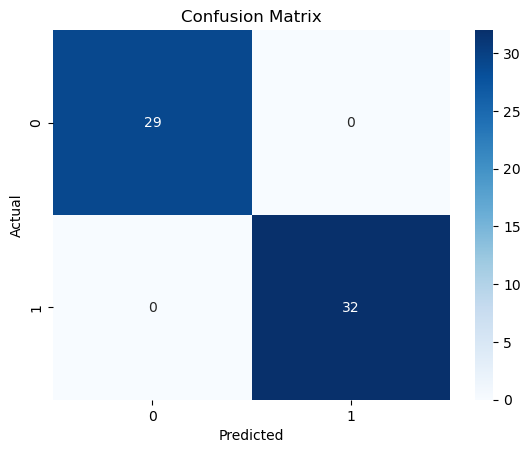

In [117]:
# Create a confusion matrix for RandomForest
lcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

## Let's deploy many machine learning models at once
## 8 machine learning algorithms will be applied to the dataset

In [122]:
classifiers = [[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
              [LogisticRegression(), 'Logistic Regression']]


In [120]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

In [125]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    # To test the model
    pred = model.predict(x_test)
    
    #To access the model
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    # To convert to %
    acc_list[model_name]=([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifier[-1][1]:
        print('')

In [126]:
acc_list

{'XGB Classifier': ['100.0%'],
 'Random Forest': ['100.0%'],
 'K-Nearest Neighbors': ['86.89%'],
 'SGD Classifier': ['81.97%'],
 'SVC': ['70.49%'],
 'Naive Bayes': ['100.0%'],
 'Decision tree': ['100.0%'],
 'Logistic Regression': ['100.0%']}

In [131]:
# To put them in a DataFrame
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1


Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,100.0%,100.0%,86.89%,81.97%,70.49%,100.0%,100.0%,100.0%


In [128]:
print("Precision")
s2=pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,100.0%,100.0%,87.5%,74.42%,69.44%,100.0%,100.0%,100.0%


In [129]:
print("Recal")
s3 = pd.DataFrame(recall_list)
s3

Recal


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,100.0%,100.0%,87.5%,100.0%,78.12%,100.0%,100.0%,100.0%


In [130]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,100.0%,100.0%,86.85%,81.03%,70.1%,100.0%,100.0%,100.0%


TypeError: missing a required argument: 'height'

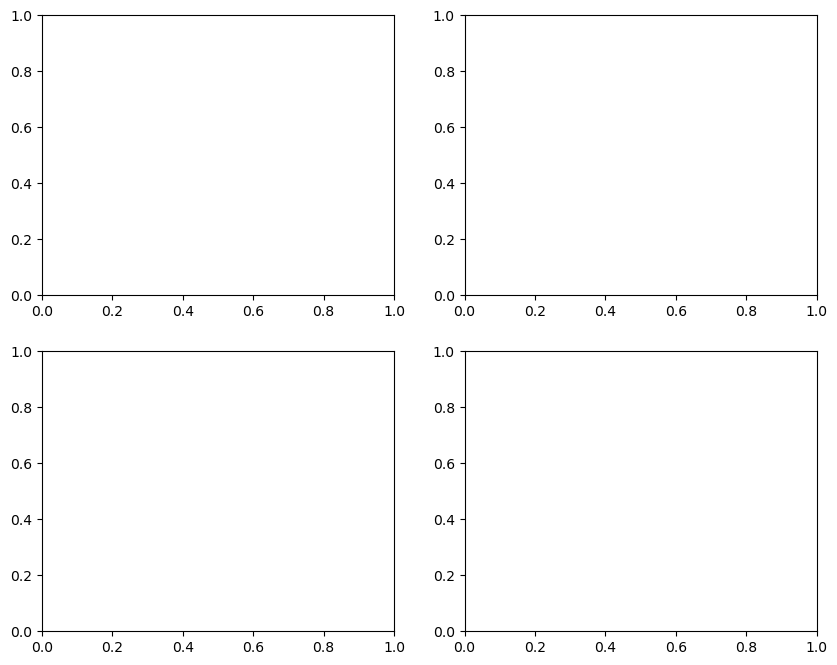

In [144]:

# Assuming you have four dataframes: s1, s2, s3, and s4
# Each of these dataframes contains values to be plotted

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Data for Accuracy Score
s1 = pd.DataFrame(acc_list)
axes[0, 0].bar(range(len(s1)), data='acc_list', tick_label=range(len(s1)))
axes[0, 0].set_title("Accuracy Score")

# Data for Precision
s2 = pd.DataFrame(precision_list)
axes[0, 1].bar(range(len(s2)), data='precision_list', tick_label=range(len(s2)))
axes[0, 1].set_title("Precision")

# Data for Recall
s3 = pd.DataFrame(recall_list)
axes[1, 0].bar(range(len(s3)), data="recall_list", tick_label=range(len(s3)))
axes[1, 0].set_title("Recall")

# Data for ROC Score
s4 = pd.DataFrame(roc_list)
axes[1, 1].bar(range(len(s4)), data='roc_list', tick_label=range(len(s4)))
axes[1, 1].set_title("ROC Score")

# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
